In [10]:
%matplotlib inline

In [11]:
import vtk
import numpy as np
from scipy import stats

In [12]:
# gs: gold standard
# in: input
gs_cst_left_fn = '/Shared/johnsonhj/HDNI/ReferenceData/HCP_DATA/test_UKF/100307/2_Rs_0_025/WMQL/wmqa_100307_cst.left.vtp'
in_cst_left_fn = '/Shared/johnsonhj/HDNI/ReferenceData/HCP_DATA/test_UKF/100307/1_Rs_default_0_02/WMQL/wmqa_100307_cst.left.vtp'

In [13]:
# read gold standard (gs)
file_reader1 = vtk.vtkXMLPolyDataReader()
file_reader1.SetFileName(gs_cst_left_fn)
file_reader1.Update()
gs_cst_left = file_reader1.GetOutput()
# read input
file_reader2 = vtk.vtkXMLPolyDataReader()
file_reader2.SetFileName(in_cst_left_fn)
file_reader2.Update()
in_cst_left = file_reader2.GetOutput()

In [14]:
#print(gs_cst_left)

In [15]:
gs_numPoints = gs_cst_left.GetNumberOfPoints()
in_numPoints = in_cst_left.GetNumberOfPoints()

gs_points = gs_cst_left.GetPoints()
in_points = in_cst_left.GetPoints()

In [16]:
print(gs_numPoints)
print(in_numPoints)
print('---')
print(gs_points)
print('---')
print(in_points)

28434
28235
---
vtkPoints (0x10f27efc0)
  Debug: Off
  Modified Time: 1153
  Reference Count: 2
  Registered Events: (none)
  Data: 0x10f27f150
  Data Array Name: Points
  Number Of Points: 28434
  Bounds: 
    Xmin,Xmax: (-63.4563, 18.0108)
    Ymin,Ymax: (-66.0334, 36.8692)
    Zmin,Zmax: (-65.4002, 67.9039)


---
vtkPoints (0x10f287a60)
  Debug: Off
  Modified Time: 1616
  Reference Count: 2
  Registered Events: (none)
  Data: 0x10f287bf0
  Data Array Name: Points
  Number Of Points: 28235
  Bounds: 
    Xmin,Xmax: (-64.6071, 18.0307)
    Ymin,Ymax: (-63.7205, 36.7826)
    Zmin,Zmax: (-65.2869, 67.8829)




In [16]:
#gs_points.GetPoint(0)[2]

In [17]:
gs_x_arr = np.array([gs_points.GetPoint(i)[0] for i in xrange(gs_numPoints)])
in_x_arr = np.array([in_points.GetPoint(i)[0] for i in xrange(in_numPoints)])
#---
gs_y_arr = np.array([gs_points.GetPoint(i)[1] for i in xrange(gs_numPoints)])
in_y_arr = np.array([in_points.GetPoint(i)[1] for i in xrange(in_numPoints)])
#---
gs_z_arr = np.array([gs_points.GetPoint(i)[2] for i in xrange(gs_numPoints)])
in_z_arr = np.array([in_points.GetPoint(i)[2] for i in xrange(in_numPoints)])

In [18]:
print(gs_x_arr)
print(in_x_arr)

[-35.34571838 -34.61727524 -33.88975525 ...,  -3.74897957  -2.8997364
  -2.00780916]
[-1.77106464 -1.52919436 -1.33055592 ..., -7.61741209 -8.18560696
 -8.74658203]


Use ksdensity to estimate probability density function for the sample data

In [19]:
data = gs_x_arr
kde = stats.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
p_gs_x = kde(x)
#----
data = gs_y_arr
kde = stats.gaussian_kde(data)
y = np.linspace(data.min(), data.max(), 100)
p_gs_y = kde(y)
#----
data = gs_z_arr
kde = stats.gaussian_kde(data)
z = np.linspace(data.min(), data.max(), 100)
p_gs_z = kde(z)

In [20]:
data = in_x_arr
kde = stats.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
p_in_x = kde(x)
#----
data = in_y_arr
kde = stats.gaussian_kde(data)
y = np.linspace(data.min(), data.max(), 100)
p_in_y = kde(y)
#----
data = in_z_arr
kde = stats.gaussian_kde(data)
z = np.linspace(data.min(), data.max(), 100)
p_in_z = kde(z)

In [21]:
import pandas as pd
from ggplot import *

/IPLlinux/raid0/homes/aghayoor/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


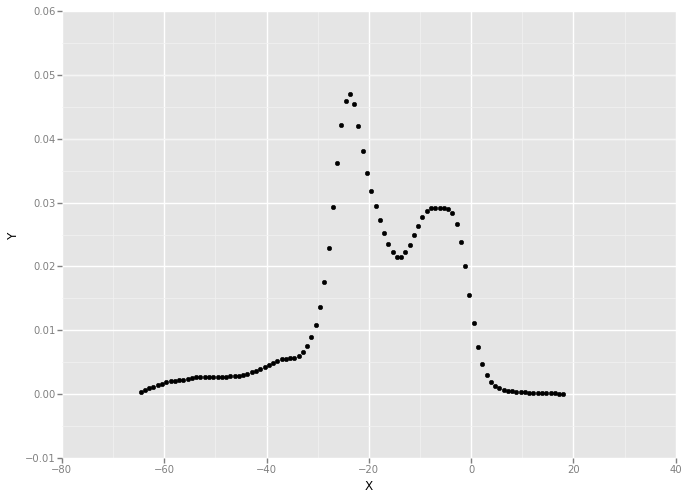

<ggplot: (315242217)>

In [22]:
DF_gs_x = pd.DataFrame(np.transpose([x, p_gs_x]))
DF_gs_x.rename(columns = lambda x: str(x), inplace=True)
DF_gs_x.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_gs_x.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
#DF_gs_x

ggplot(aes(x = 'X', y ='Y'),data=DF_gs_x) + \
    geom_point()

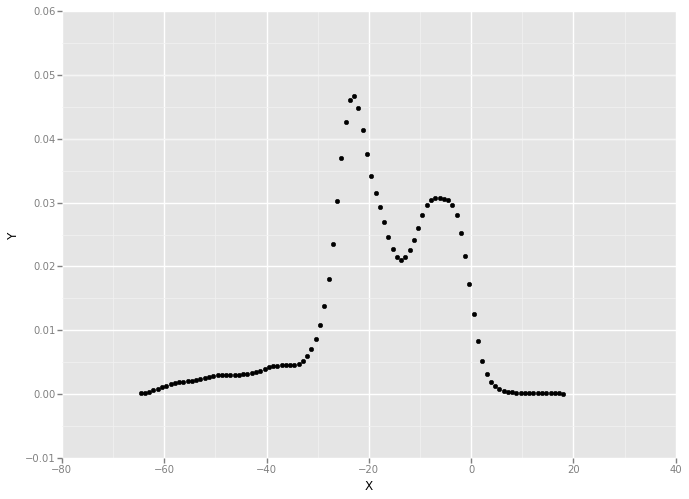

<ggplot: (315239409)>

In [23]:
DF_in_x = pd.DataFrame(np.transpose([x, p_in_x]))
DF_in_x.rename(columns = lambda x: str(x), inplace=True)
DF_in_x.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_in_x.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
#DF_in_x

ggplot(aes(x = 'X', y ='Y'),data=DF_in_x) + \
    geom_point()

# Bhattacharyya Coefficient

In [24]:
Bc = (1.0/3.0)*( np.sum(np.sqrt(p_gs_x * p_in_x)) + np.sum(np.sqrt(p_gs_y * p_in_y)) + np.sum(np.sqrt(p_gs_z * p_in_z)) )
print(Bc)

0.97080829719
